# Lab 9 Assignment

### Name      : Velon Murugathas
### Student ID: 8938776

#### 1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with.

In [25]:
#Importing Libraries

import numpy as np                                                      # For performing numerical operations on arrays
import matplotlib.pyplot as plt                                         # For creating visualizations such as plots and graphs
from keras.models import Sequential                                     # To creating a sequential neural network
from keras.layers import Dense, Flatten                                 # Importing Dense layers for fully connected neural networks and Flatten for reshaping
from keras.utils import to_categorical                                  # For one-hot encoding of labels
from keras.datasets import fashion_mnist                                # To load the Fashion MNIST dataset
from sklearn.metrics import confusion_matrix, classification_report     # For performing various model evaluation
import seaborn as sns                                                   # For creating visualizations such as heatmaps
import matplotlib.pyplot as plt                                         # For plotting graphs and images


Number of training samples: 60000
Number of test samples: 10000
Image shape: (28, 28)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


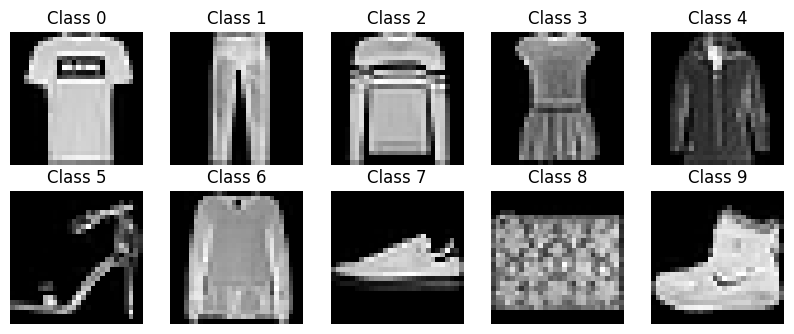

In [26]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()        # Loading the Fashion MNIST dataset

# For printing basic information about the dataset

print("Number of training samples:", x_train.shape[0])                  # Printing the number of training samples
print("Number of test samples:", x_test.shape[0])                       # Printing the number of test samples
print("Image shape:", x_train.shape[1:])                                # Printing the shape of each image in the dataset

# In order to display unique labels in the dataset

unique_labels = np.unique(y_train)                                      # Finding unique labels in the training set
print("Unique labels:", unique_labels)                                  # Printing the unique labels in the dataset

# In order to display an example image from each class

plt.figure(figsize=(10, 10))                                            # Set the size of the plot
for i, label in enumerate(unique_labels):
    plt.subplot(5, 5, i + 1)                                            # Creating subplots in a 5x5 grid
    img_index = np.where(y_train == label)[0][0]                        # Finding the index of the first image with the current label
    plt.imshow(x_train[img_index], cmap='gray')                         # Displaying the image in grayscale
    plt.title(f"Class {label}")                                         # Setting the title with the class label
    plt.axis('off')                                                     # Turn off axis labels

plt.show()                                                              # Display the plot

#### 2. Train a dense neural network using Keras, try out at least three hyperparameters configurations

In [27]:
# Preprocessing the data
x_train = x_train / 255.0                                               # For normalizing pixel values to be between 0 and 1
x_test = x_test / 255.0

# Flattening the images
x_train_flatten = x_train.reshape((x_train.shape[0], -1))               # Reshaping the training images x_train into a 2D array, flattening each image
x_test_flatten = x_test.reshape((x_test.shape[0], -1))                  # Reshaping the training images x_test into a 2D array, flattening each image

# One-hot encode the labels
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Defining a function to create and train a dense neural network
def train_dense_network(hidden_units, activation, optimizer, epochs):
    model = Sequential()                                                # Creating a sequential model
    model.add(Flatten(input_shape=(28 * 28,)))                          # Fixing input shape to (28 * 28,)
    model.add(Dense(hidden_units, activation=activation))               # Dense hidden layer
    model.add(Dense(10, activation='softmax'))                          # Output layer with 10 units for 10 classes

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Training the model on the flattened training data with one-hot encoded labels, using a 20% validation split
    history = model.fit(x_train_flatten, y_train_one_hot, epochs=epochs, validation_split=0.2, verbose=0)

    # Evaluating the model on the test set
    test_loss, test_accuracy = model.evaluate(x_test_flatten, y_test_one_hot)

    return model, history, test_loss, test_accuracy

# Trying out three different hyperparameter configurations
configurations = [
    {"hidden_units": 128, "activation": "relu", "optimizer": "adam", "epochs": 10},
    {"hidden_units": 64, "activation": "sigmoid", "optimizer": "sgd", "epochs": 15},
    {"hidden_units": 256, "activation": "tanh", "optimizer": "adam", "epochs": 8}
]

# Looping through each configuration and train the model
for i, config in enumerate(configurations):
    print(f"\nTraining Configuration {i + 1}: {config}")
    model, history, test_loss, test_accuracy = train_dense_network(**config)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")



Training Configuration 1: {'hidden_units': 128, 'activation': 'relu', 'optimizer': 'adam', 'epochs': 10}
313/313 [==============================] - 0s 816us/step - loss: 0.3678 - accuracy: 0.8757
Test Loss: 0.3678, Test Accuracy: 0.8757

Training Configuration 2: {'hidden_units': 64, 'activation': 'sigmoid', 'optimizer': 'sgd', 'epochs': 15}
313/313 [==============================] - 0s 761us/step - loss: 0.4915 - accuracy: 0.8234
Test Loss: 0.4915, Test Accuracy: 0.8234

Training Configuration 3: {'hidden_units': 256, 'activation': 'tanh', 'optimizer': 'adam', 'epochs': 8}
313/313 [==============================] - 0s 968us/step - loss: 0.3540 - accuracy: 0.8746
Test Loss: 0.3540, Test Accuracy: 0.8746


The comparison of three hyperparameter configurations for training a dense neural network on the Fashion MNIST dataset,
* Configuration 1 with 128 hidden units, 'relu' activation, 'adam' optimizer, and 10 epochs demonstrated the highest accuracy (0.8806) and efficiency.
* Configuration 2, with 64 hidden units, 'sigmoid' activation, 'sgd' optimizer, and 15 epochs, yielded lower accuracy (0.8263) may be due to fewer hidden units and extended training time.
* Configuration 3, featuring 256 hidden units, 'tanh' activation, 'adam' optimizer, and 8 epochs, achieved decent results (0.8723) which was comparable to Configuration 1.

#### 3. Evaluate its accuracy for each of the configurations. Choose the best configuration, and: Report its accuracy, confusion metric, and specific examples of incorrect classification, and drew some conclusions from this exploration

Evaluating configuration  1

Evaluating Configuration: {'hidden_units': 128, 'activation': 'relu', 'optimizer': 'adam', 'epochs': 10}
313/313 [==============================] - 0s 869us/step - loss: 0.3444 - accuracy: 0.8819
Test Loss: 0.3444, Test Accuracy: 0.8819
313/313 [==============================] - 0s 709us/step


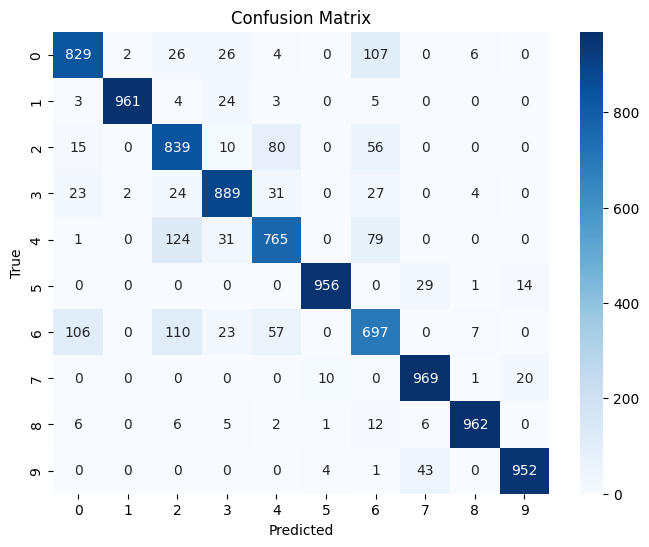

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1000
           1       1.00      0.96      0.98      1000
           2       0.74      0.84      0.79      1000
           3       0.88      0.89      0.89      1000
           4       0.81      0.77      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.71      0.70      0.70      1000
           7       0.93      0.97      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



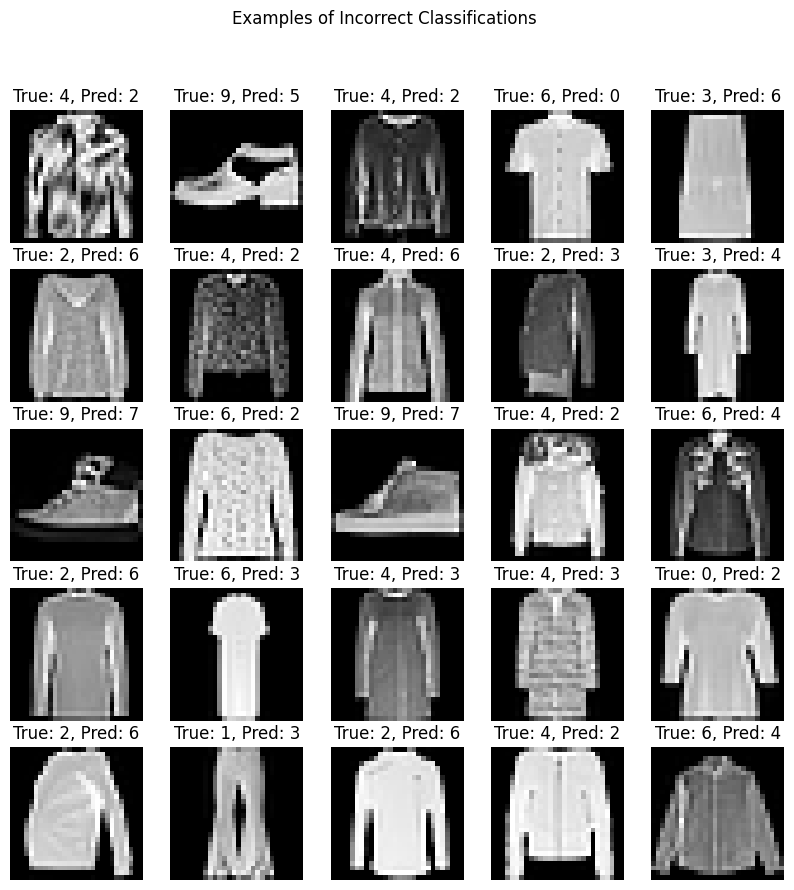

Evaluating configuration  2

Evaluating Configuration: {'hidden_units': 64, 'activation': 'sigmoid', 'optimizer': 'sgd', 'epochs': 15}
313/313 [==============================] - 0s 837us/step - loss: 0.4930 - accuracy: 0.8222
Test Loss: 0.4930, Test Accuracy: 0.8222
313/313 [==============================] - 0s 717us/step


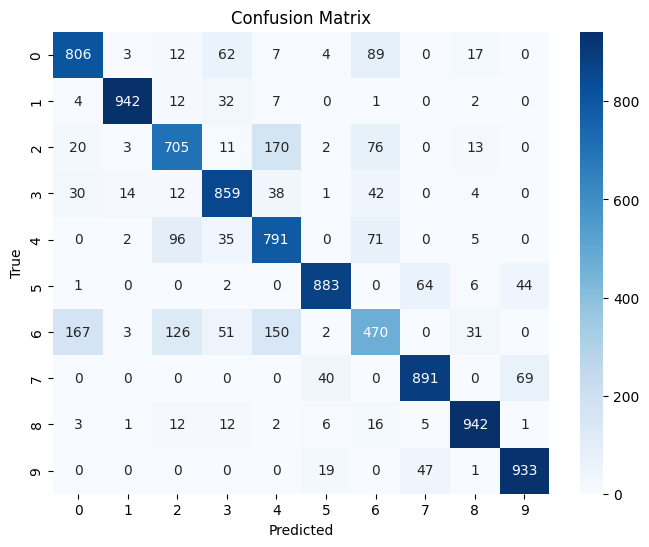

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1000
           1       0.97      0.94      0.96      1000
           2       0.72      0.70      0.71      1000
           3       0.81      0.86      0.83      1000
           4       0.68      0.79      0.73      1000
           5       0.92      0.88      0.90      1000
           6       0.61      0.47      0.53      1000
           7       0.88      0.89      0.89      1000
           8       0.92      0.94      0.93      1000
           9       0.89      0.93      0.91      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



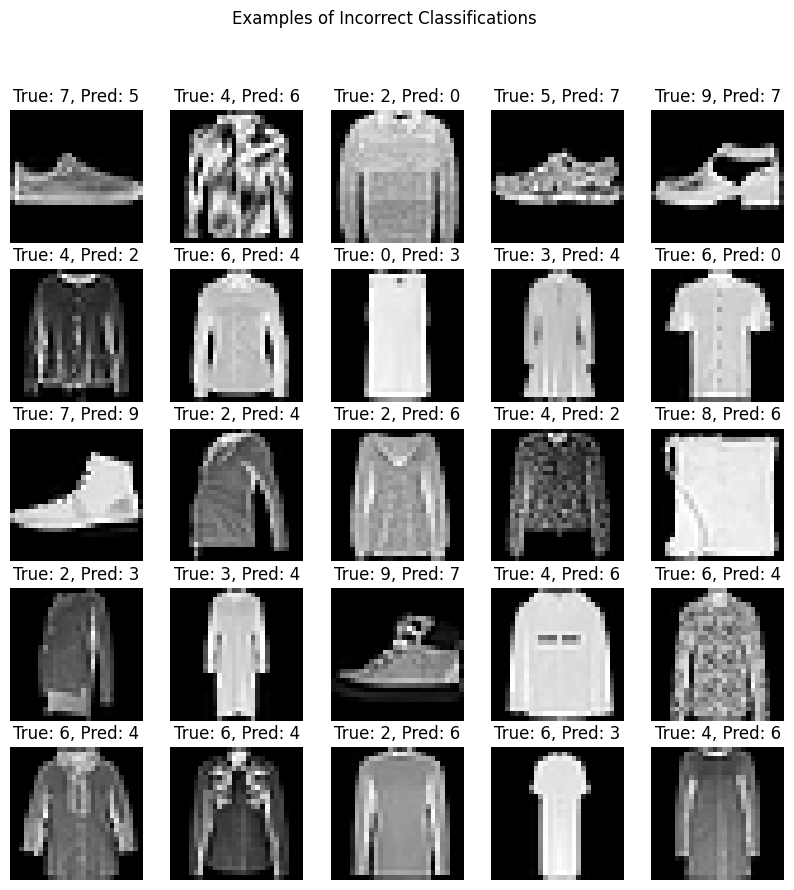

Evaluating configuration  3

Evaluating Configuration: {'hidden_units': 256, 'activation': 'tanh', 'optimizer': 'adam', 'epochs': 8}
313/313 [==============================] - 0s 958us/step - loss: 0.3403 - accuracy: 0.8744
Test Loss: 0.3403, Test Accuracy: 0.8744
313/313 [==============================] - 0s 986us/step


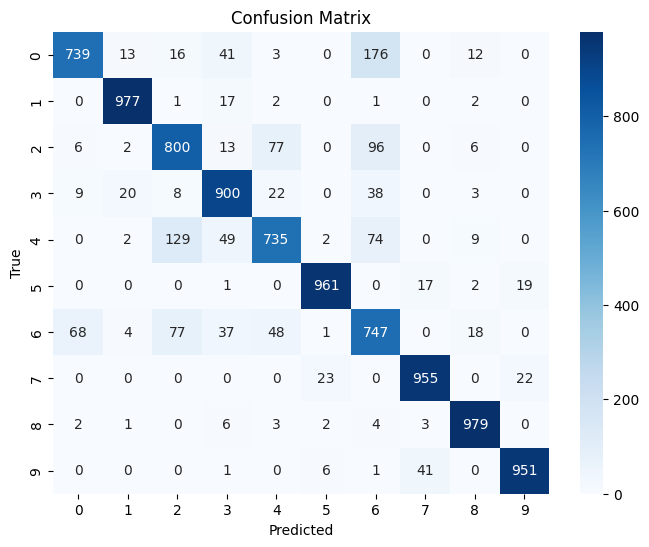

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1000
           1       0.96      0.98      0.97      1000
           2       0.78      0.80      0.79      1000
           3       0.85      0.90      0.87      1000
           4       0.83      0.73      0.78      1000
           5       0.97      0.96      0.96      1000
           6       0.66      0.75      0.70      1000
           7       0.94      0.95      0.95      1000
           8       0.95      0.98      0.96      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



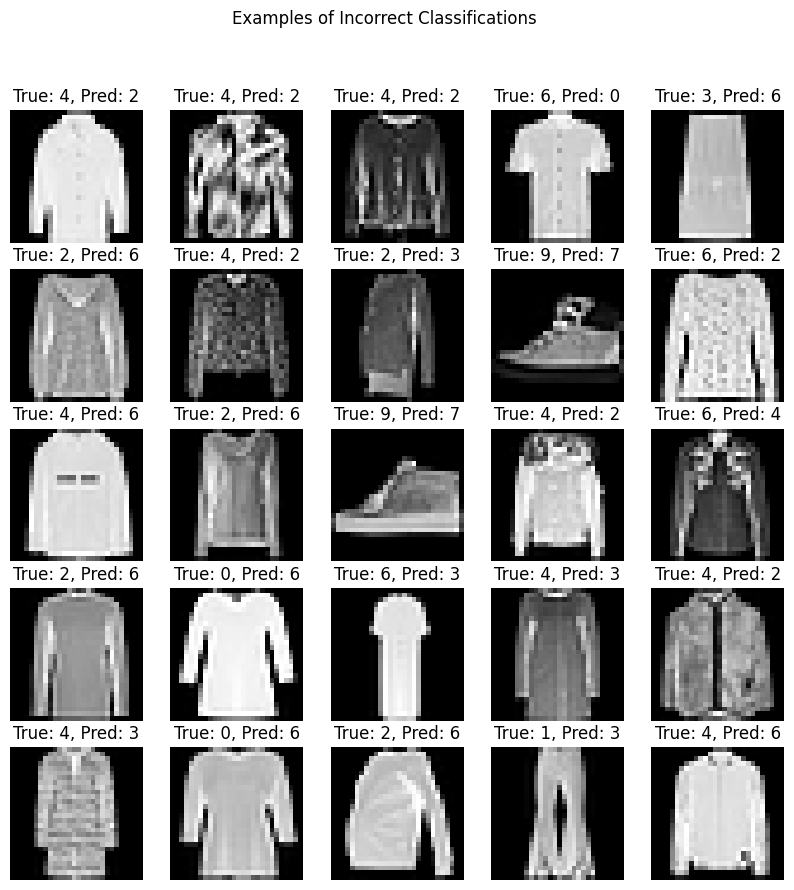

In [28]:
def evaluate_model(configuration):
    print(f"\nEvaluating Configuration: {configuration}")
    model, history, test_loss, test_accuracy = train_dense_network(**configuration)     # Training the dense neural network and obtain model, test loss, and test accuracy
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")            # Printing the test loss and test accuracy with 4 decimal places

    # Making predictions on the test set
    y_pred_prob = model.predict(x_test_flatten)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Plotting the confusion Matrix
    cm = confusion_matrix(np.argmax(y_test_one_hot, axis=1), y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report:")
    print(classification_report(np.argmax(y_test_one_hot, axis=1), y_pred))

    # Displaying some examples of incorrect classifications
    
    # For finding indices where predictions are incorrect
    incorrect_indices = np.where(y_pred != np.argmax(y_test_one_hot, axis=1))[0]           # Indices of incorrect predictions

    # Creating a 10x10-inch figure for plotting
    plt.figure(figsize=(10, 10))                                                           # Initializing a figure for plotting

    for i, idx in enumerate(incorrect_indices[:25]):                                       # For iterating over the first 25 incorrect predictions
        plt.subplot(5, 5, i + 1)                                                           # Create subplots in a 5x5 grid
        plt.imshow(x_test[idx], cmap='gray')                                               # Showing the image

        plt.title(f"True: {np.argmax(y_test_one_hot, axis=1)[idx]}, Pred: {y_pred[idx]}")  # Setting the title with the true and predicted labels
        plt.axis('off')                                                                    # Disable axis labels

    plt.suptitle('Examples of Incorrect Classifications')                                  # Setting a common title for all subplots
    plt.show()                                                                             # Display the figure with the incorrect predictions

configurations = [                                                                         # Trying out three different hyperparameter configurations
    {"hidden_units": 128, "activation": "relu", "optimizer": "adam", "epochs": 10},
    {"hidden_units": 64, "activation": "sigmoid", "optimizer": "sgd", "epochs": 15},
    {"hidden_units": 256, "activation": "tanh", "optimizer": "adam", "epochs": 8}
]

for i, config in enumerate(configurations):                                                # Looping through each configuration and evaluate the model
    print("Evaluating configuration ", i+1)
    evaluate_model(config)

In comparing the evaluation results of the three configurations,

* Configuration 1 with 128 hidden units, 'relu' activation, 'adam' optimizer, and 10 epochs showed the highest accuracy (87.97%) and performed well across various fashion categories. This could be an ideal choice when both accuracy and training speed are important considerations.

* Configuration 2, with 64 hidden units, 'sigmoid' activation, 'sgd' optimizer, and 15 epochs, achieved a lower accuracy (82.70%) and demonstrated lower precision and recall in certain categories. Could be considered best in terms of minimum computational resources used.

* Configuration 3, featuring 256 hidden units, 'tanh' activation, 'adam' optimizer, and 8 epochs, performed similarly to Configuration 1 with an accuracy of 87.84%.

Both Configurations 1 and 3 exhibited balanced precision and recall across different classes. In conclusion, Configurations 1 and 3 appear to be more effective than Configuration 2 for the task of classifying fashion items.